# Applied Statistics Tasks **$^1$**

**Francesco Troja**

***

# Python Libraries

This notebook utilizes a selection of Python libraries, each chosen for its specific functionalities and capabilities to address the diverse needs of the tasks within the project. These libraries were carefully selected to ensure the successful execution of all tasks, aligning with the project’s objectives and technical requirements.

In [1]:
# import libraries
import math
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import hypergeom, kstest
import pandas as pd
import seaborn as sns

## Task 1: **Permutations and Combinations**

<figure style="text-align:center;">
    <img src="T1-fisher.png" alt="Lady Testing Tea" width="400"/>
    <figcaption>Photo credit<sup>1</sup> </figcaption>
</figure>

### Table of Contents
1. [Problem Statement](#problem_statement)
2. [Introduction to the problem](#2)
3. [Understand the Problem](#4)
   -   [3.1 Permutations](#4_1)
   -   [3.2 combinations](#4_2)
4. [Visualize the experiment](#5)
5. [Hypothesis Testing](#6)
   - [Introduction to Null Hypothesis](#6-1)
6. [References](#references)

### 1. Problem Statement <a class="anchor" id="problem_statement"></a>
> Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
>
>Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.
>
>Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error. 
>
>Would you accept two errors? Explain.

### 2. Introduction to the problem <a class="anchor" id="2"></a>


Before delving into problem resolution, it’s important to provide some context to better understand the origins of the experiment and why it was conducted. This background will help clarify how to approach the task at hand. The "**Lady Tasting Tea**" experiment is a essential example in the field of *statistics* and *hypothesis testing*, introduced by **Ronald A. Fisher** in the 1920s. The experiment was inspired by a claim made during a social gathering at Cambridge, where **Muriel Bristol**, a biologist, confidently stated that she could *distinguish* whether *milk or tea was poured first into a cup of tea*. Fisher, intrigued by her assertion, saw this as an opportunity to design a simple yet robust experiment to test her claim and demonstrate key principles of hypothesis testing **$^2$**.

Following Fisher's words in his book The Design of Experiments (1935, p. 13) **$^3$**:
> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

### 3. Understand the Problem

In this variation of the experiment, the task is to determine the probability that the participant correctly selects the **six cups** where *milk was poured first* (or tea, depending on the scenario), assuming random guessing without any special knowledge. This involves solving a combinatorial problem to calculate the chances of *selecting six correct cups out of twelve*. Referring again to The Design of Experiments, it is noteworthy that Fisher himself advocated for the use of **permutations** and **combinations**—*two essential concepts in combinatorics*, which is the branch of mathematics focused on counting and arrangement:

> [...] There are 70 ways of choosing a group pf 4 objects out of 8. This may be demonstrated by an argument familiar to students of "permutations and combinations," namely, that if we were to choose the 4 objects in succession we hould have successively 8, 7, 6, 5 objects to choose from, and could make our succession of choices in 8x7x6x5, or 1680 ways.

(Fisher, 1935. p.14)

By utilizing these combinatorial methods, the number of possible outcomes can be systematically analyzed, allowing for more precise experimental design and interpretation. In the following section, the concepts of **permutations** and **combinations** will be explored further to clarify their differences and their application in this type of problem **$^9$**.

In [2]:
# total number of cups
n = 12 
# number of cups with milk first (or tea first, depending from the scenario)
k= 6

#### 3.1 Permutations

**Permutations** in probability theory refer to the *various ways a set of items can be arranged in a specific order*. A *key characteristic* of permutations is that the **order of the items matters**. For instance, consider a four-digit PIN: each digit must occupy the correct position for the PIN to be valid. If we take the digits 1, 2, 3, and 4, the arrangement "1234" is distinct from "4321." Although both sequences use the same digits, they represent different outcomes because their order differs **$^{10}$**.

There are three main types of permutations:

- **Permutations of distinct items**: Where all items are unique **$^{10}$**.
- **Permutations with repetition**: Where some items may be repeated **$^{10}$**.
- **Circular permutations**: Where the arrangement is in a circle, changing how we calculate the order **$^{11}$**.

For the scope of this task, the study will focus on the first type of permutation: **permutations of distinct items**. 

The mathematical formula for calculating permutations is:

$$P(n, k) = \frac{n!}{(n - k)!}$$

where:
- $n$ = total number of items available to choose from
- $k$ = number of items to arrange
- $n!$ ($n$ factorial) = product of all positive integers up to $n$
- $P(n,k)$ = the number of ways to arrange $k$ items out of $n$
- $(n-k)!$ = factorial of the difference between the total items and the items chosen **$^{12}$**

  




#### 3.2 Combinations

Combinations, on the other hand, are used to determine how many ways a subset of items can be selected from a larger group, where the order of selection does not matter. For example, suppose you need to choose three letters—A, B, and C—from a set. The arrangements ACB, ABC, or BAC would all be considered the same combination since the order doesn't matter. Unlike permutations, where order is important, combinations focus solely on the selection of items, disregarding how they are arranged **$^{13}$**. 

The mathematical formula for calculating Combination is:

$$C(n, k) = \frac{n!}{k!(n - k)!}$$

where:
- $n$ = total number of items
- $k$ = the number of items to choose
- $C(n,k)$ = the number of ways to choose $k$ items out of $n$.

The main difference in the permutation and combination mathematical formula is that combinations include a division by $k!$ to account for the fact that the order of the selected items doesn't matter. In other words, combinations count only unique groupings, ignoring different arrangements of the same items. On the other hand, permutations do not include this division by $k!$, meaning every possible arrangement (or order) of the selected items is counted, making order important in permutations **$^{13}$**.

Now that we have a clear understanding of permutations and combinations, we can analyze the problem to determine which concept applies. As discussed earlier, the key distinction between permutations and combinations is that in permutations, the order matters, whereas in combinations, it does not. This distinction provides a helpful starting point for understanding the Lady Tasting Tea experiment. Since the task involves selecting a specific set of cups without regard to the order in which they are chosen, it is evident that we need to consider combinations, not permutations, to solve the problem effectively.

A straightforward way to calculate combinations in Python is by using the `math.comb(n, k)` function from the `math` package. This function takes two parameters: $n$, which represents the total number of items, and $k$, the number of items to be selected. It then returns the number of possible ways to choose k items from n items without considering the order of selection **$^{14}$**.

In [3]:
#using math.comb to calculate combinations
def calc_combinations(n, k):
    return math.comb(n, k)


print(f"The number of ways to choose 6 cups from 12 is: {calc_combinations(n, k)}")


The number of ways to choose 6 cups from 12 is: 924


To gain deeper insights into the workings of the math.comb(n, k) function, we can employ an alternative approach. This method will also help verify the accuracy of the results obtained from the previous function. First, let’s consider the total number of ways to select six cups from twelve, taking into account the order of selection. This is represented by calculating $12!$ (12 factorial). A factorial is a mathematical function that multiplies a given number $𝑛$ by every positive integer that precedes it. In simpler terms, the factorial of a number is the product of all whole numbers from that number down to one. The formula is expressed as **$^{15}$**:
​
$$n!=n×(n−1)×(n−2)×⋯×1$$

Next, we need to account for the number of ways to arrange the six selected cups. Once we have this information, we can apply the combination formula to calculate the number of ways to choose six cups from twelve without regard to order. The combination formula is given by:

$$C(12, 6) = \frac{12!}{6!(12 - 6)!}$$

​This formula allows us to find the number of unique combinations of six cups selected from a total of twelve, ensuring we are considering all possible selections accurately.


In [4]:
ways_ordered = 12*11*10*9*8*7
no_shuffles = 6 * 5 *4 *3 *2 *1
no_combs = ways_ordered // no_shuffles

print(f"Total number of ordered selections: {ways_ordered}")
print(f"Number of ways to arrange 6 selected cups: {no_shuffles}")
print(f"The total number of combinations of selecting 6 cups from 12 is: {no_combs}")

Total number of ordered selections: 665280
Number of ways to arrange 6 selected cups: 720
The total number of combinations of selecting 6 cups from 12 is: 924


### 4. Visualize the experiment <a class="anchor" id="5"></a>

Now that we have analyzed the data and determined that the total number of combinations for selecting 6 cups from 12 is 924, we can move on to the next part of the task. In this step, we will attempt to visualize the number of ways the lady can select between 1 and 6 correct cups in a random order. This part of the Lady Tasting Tea experiment is important because it allows us to calculate the probability distribution for different outcomes. By understanding how the probability of success changes with each possible number of correct selections, we can better evaluate the chance of the lady's success being due to pure chance.

Furthermore, this visualization plays a vital role in the discussion of the null hypothesis, which will be elaborated upon in the final section of the task.

Let's begin by generating a list that represents the total number of cups using the range function. By default, range starts from 0, but in this scenario, we want to avoid having a case where there are 0 cups. To adjust for this, we can modify the range to start from 1 instead of 0. The line generates a list of unique labels for each cup. Since there are 12 cups, the function will generate a sequence of integers from 1 to 12.

In [5]:
labels = list(range(1, n+1))
print(f"The Total number of cups is: {labels}")

The Total number of cups is: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Now that we have a list containing the total number of cups, we can generate all possible combinations of selecting 6 cups where the milk is added first (or vice versa). To do this, we use the `itertools.combinations(iterable, r)` function. This function is ideal because it generates all unique combinations of a specified length from an input iterable, ensuring no repetition and returning them in lexicographic order. The `itertools.combinations()` function takes two main arguments:

- `iterable`: The input sequence (e.g., a list of cups) from which the combinations are generated.
- `r`: The number of items in each combination (in this case, 6 cups)**$^{16}$**.

**Note**: This function returns an iterator that generates the combinations on demand, rather than precomputing and storing them all at once. For the purposes of this task, however, the result will be stored in a list, making it easy to access all combinations at once in a straightforward manner **$^{17}$**.

In [6]:
combs = list(itertools.combinations(labels, k))
print(f"Generated {len(combs)} combinations of {k} elements from the total set of cups:\n ")
for comb in combs:
    print(comb)

Generated 924 combinations of 6 elements from the total set of cups:
 
(1, 2, 3, 4, 5, 6)
(1, 2, 3, 4, 5, 7)
(1, 2, 3, 4, 5, 8)
(1, 2, 3, 4, 5, 9)
(1, 2, 3, 4, 5, 10)
(1, 2, 3, 4, 5, 11)
(1, 2, 3, 4, 5, 12)
(1, 2, 3, 4, 6, 7)
(1, 2, 3, 4, 6, 8)
(1, 2, 3, 4, 6, 9)
(1, 2, 3, 4, 6, 10)
(1, 2, 3, 4, 6, 11)
(1, 2, 3, 4, 6, 12)
(1, 2, 3, 4, 7, 8)
(1, 2, 3, 4, 7, 9)
(1, 2, 3, 4, 7, 10)
(1, 2, 3, 4, 7, 11)
(1, 2, 3, 4, 7, 12)
(1, 2, 3, 4, 8, 9)
(1, 2, 3, 4, 8, 10)
(1, 2, 3, 4, 8, 11)
(1, 2, 3, 4, 8, 12)
(1, 2, 3, 4, 9, 10)
(1, 2, 3, 4, 9, 11)
(1, 2, 3, 4, 9, 12)
(1, 2, 3, 4, 10, 11)
(1, 2, 3, 4, 10, 12)
(1, 2, 3, 4, 11, 12)
(1, 2, 3, 5, 6, 7)
(1, 2, 3, 5, 6, 8)
(1, 2, 3, 5, 6, 9)
(1, 2, 3, 5, 6, 10)
(1, 2, 3, 5, 6, 11)
(1, 2, 3, 5, 6, 12)
(1, 2, 3, 5, 7, 8)
(1, 2, 3, 5, 7, 9)
(1, 2, 3, 5, 7, 10)
(1, 2, 3, 5, 7, 11)
(1, 2, 3, 5, 7, 12)
(1, 2, 3, 5, 8, 9)
(1, 2, 3, 5, 8, 10)
(1, 2, 3, 5, 8, 11)
(1, 2, 3, 5, 8, 12)
(1, 2, 3, 5, 9, 10)
(1, 2, 3, 5, 9, 11)
(1, 2, 3, 5, 9, 12)
(1, 2, 3, 5, 10, 11)
(

Now that we have a list containing all possible combinations of selecting 6 cups, we can move forward by focusing on the actual selection of cups for the experiment. To do this, we will randomly select 6 cups where milks is added first from a total of 12 using simple random sampling. This step mirrors how, in the real-world experiment, the cups would be chosen without bias. We implement this randomness using `random.sample(labels, k)`, which ensures that each cup has an equal probability of being chosen. This technique is crucial because it maintains the integrity of the experiment by guaranteeing that no prior assumptions or patterns influence the selection of cups. This random selection will be also the key to evaluating the null hypothesis in the later part of the task **$^{18}$** **$^{19}$**.  

In [7]:
cups_milk_first = random.sample(labels, 6)
print("The randomly selected cups containing milk added first are:\n", cups_milk_first)

The randomly selected cups containing milk added first are:
 [7, 5, 9, 11, 4, 10]


We previously generated 924 combinations and now, with the randomly selected sample of cups, we will calculate the overlap between these two sets. This calculation is crucial for evaluating the accuracy of the lady’s guesses by directly comparing the cups she selected to those that are confirmed to have milk added first. By determining the number of selections that align with the correct combinations, we can gain valuable insights into her guessing performance. Understanding this overlap is not only important for assessing her accuracy but also for evaluating the statistical significance of her ability to distinguish between the cups. If the number of correct selections significantly exceeds what would be expected by random chance, we can start to gather evidence supporting her claim of possessing a special skill. Additionally, this analysis will help us identify whether her guessing pattern shows any systematic bias or if it is merely a result of random selection  **$^{20}$**.

In [8]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

for comb in combs:
  overlap = set(comb).intersection(set(cups_milk_first))
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(1, 2, 3, 4, 5, 6) {4, 5} 2
(1, 2, 3, 4, 5, 7) {4, 5, 7} 3
(1, 2, 3, 4, 5, 8) {4, 5} 2
(1, 2, 3, 4, 5, 9) {9, 4, 5} 3
(1, 2, 3, 4, 5, 10) {10, 4, 5} 3
(1, 2, 3, 4, 5, 11) {11, 4, 5} 3
(1, 2, 3, 4, 5, 12) {4, 5} 2
(1, 2, 3, 4, 6, 7) {4, 7} 2
(1, 2, 3, 4, 6, 8) {4} 1
(1, 2, 3, 4, 6, 9) {9, 4} 2
(1, 2, 3, 4, 6, 10) {10, 4} 2
(1, 2, 3, 4, 6, 11) {11, 4} 2
(1, 2, 3, 4, 6, 12) {4} 1
(1, 2, 3, 4, 7, 8) {4, 7} 2
(1, 2, 3, 4, 7, 9) {9, 4, 7} 3
(1, 2, 3, 4, 7, 10) {10, 4, 7} 3
(1, 2, 3, 4, 7, 11) {11, 4, 7} 3
(1, 2, 3, 4, 7, 12) {4, 7} 2
(1, 2, 3, 4, 8, 9) {9, 4} 2
(1, 2, 3, 4, 8, 10) {10, 4} 2
(1, 2, 3, 4, 8, 11) {11, 4} 2
(1, 2, 3, 4, 8, 12) {4} 1
(1, 2, 3, 4, 9, 10) {9, 10, 4} 3
(1, 2, 3, 4, 9, 11) {9, 11, 4} 3
(1, 2, 3, 4, 9, 12) {9, 4} 2
(1, 2, 3, 4, 10, 11) {10, 11, 4} 3
(1, 2, 3, 4, 10, 12) {10, 4} 2
(1, 2, 3, 4, 11, 12) {11, 4} 2
(1, 2, 3, 5, 6, 7) {5, 7} 2
(1, 2, 3, 5, 6, 8) {5} 1
(1, 2, 3, 5, 6, 9) {9, 5} 2
(1, 2, 3, 5, 6, 10) {10, 5} 2
(1, 2, 3, 5, 6, 11) {11, 5} 2
(1, 2, 3, 5, 6, 12)

With the overlaps identified, the next step is to determine the frequency of each overlap level. By using counts = np.unique(no_overlaps, return_counts=True), we effectively summarize how many of the 924 possible combinations result in 0, 1, 2, ..., or 6 correct selections. This provides a clear distribution of correct guesses, which is essential for interpreting the outcome **$^{21}$**. 

In [9]:
counts = np.unique(no_overlaps, return_counts=True)
overlap_levels, frequencies = counts

print("Overlap Levels and Their Frequencies:")
for level, freq in zip(overlap_levels, frequencies):
    print(f"Overlap Level {level}: {freq} occurrences")

Overlap Levels and Their Frequencies:
Overlap Level 0: 1 occurrences
Overlap Level 1: 36 occurrences
Overlap Level 2: 225 occurrences
Overlap Level 3: 400 occurrences
Overlap Level 4: 225 occurrences
Overlap Level 5: 36 occurrences
Overlap Level 6: 1 occurrences


let's now visualize the results:

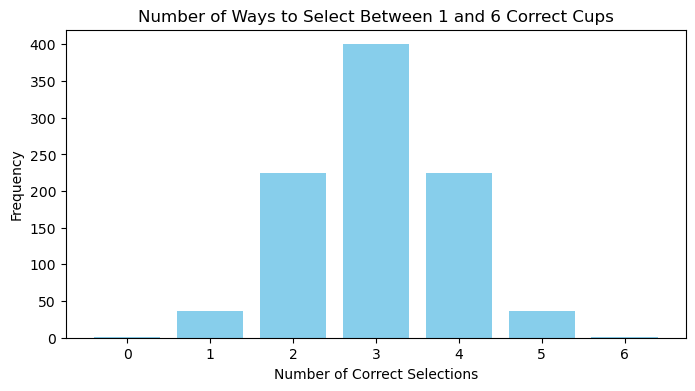

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(counts[0], counts[1], color='skyblue')
ax.set_xlabel('Number of Correct Selections')
ax.set_ylabel('Frequency')
ax.set_title('Number of Ways to Select Between 1 and 6 Correct Cups')
plt.show()

### 5. Hypothesis Testing <a class="anchor" id="6"></a>

The second part of this task will explore advanced statistical concepts, concentrating on hypothesis testing to evaluate if an individual can genuinely identify the order in which milk or tea was poured into a cup first. Hypothesis testing is a powerful tool that allows researchers and data analysts to make evidence-based conclusions. This section will begin by introducing the Null Hypothesis, a fundamental component in hypothesis testing, which serves as a baseline assumption and is pivotal for interpreting test results **$^{22}$**. 

### 5.1 Introduction to Null Hypothesis <a class="anchor" id="6-1"></a>

Hypothesis testing is a statistical process used to evaluate two opposing hypotheses to draw conclusions from experimental data: 

-  **The null hypothesis**, denoted by *$H_0$*, represents the assumption that there is no specific effect, difference, or relationship present in the context of the experiment. It posits that any observed variations in the data are likely due to random chance rather than a true effect. 
-  **The alternative hypothesis**, denoted by *$H_1$*, proposes that a significant effect, difference, or relationship does exist, which contrasts the null hypothesis.
  
At the conclusion of a hypothesis test, researchers arrive at one of two potential decisions:

- **Insufficient Evidence to Reject the Null Hypothesis**: ndicates that observed differences are likely due to sampling errors.
- **Sufficient Evidence to Reject the Null Hypothesis**: The results are statistically significant, indicating strong evidence against the null hypothesis.

It is important to understand that failing to reject the null hypothesis does not imply that the null hypothesis is definitively true. Instead, it indicates that the evidence collected is insufficient to support the alternative hypothesis. This distinction underscores the probabilistic nature of hypothesis testing, where conclusions are drawn based on the strength of evidence rather than certainties **$^{23}$**.

*The concept of the null hypothesis* was first introduced by **Ronald Fisher** in the early 20th century. Fisher's major work, **Statistical Methods for Research Workers**, first published in 1925, laid the foundation for significance tests. In this book, Fisher emphasized the importance of hypothesis testing in scientific research, advocating for a systematic approach to inferential statistics that allows researchers to draw conclusions based on experimental data. **$^{24}$**

In his later work, **The Design of Experiments**, Ronald A. Fisher *elaborated on the concept of the null hypothesis*, particularly through the lens of the Lady Tasting Tea experiment. He proposed that:

> Our examination [...] has therefore led us to a statistical test of significance, by which these results are divided into two classes with opposed interpretations. [...] The two classes of results which are distinguished by our test of significance are, on the one hand, those which show a significant discrepancy from a certain hypothesis; namely, in this case, the hypothesis that the judgments given are in no way influenced by the order in which the ingredients have been added; and on the other hand, results which show no significant discrepancy from this hypothesis. [...] In relation to any experiment, we may speak of this hypothesis as the 'null hypothesis.' It should be noted that the null hypothesis is never proved or established, but is possibly disproved in the course of experimentation. Every experiment may be said to exist only to give the facts a chance of disproving the null hypothesis. (Fisher, pp. 18-19).

In the context of the Lady Tasting Tea experiment, the null and alternative hypotheses can be expressed as follows:

- **$H_0$**: The lady is guessing; her ability to correctly identify the order of milk and tea is due to random chance. 
- **$H_1$**: The lady has a special ability to distinguish the order in which the milk and tea were added.

With the Null Hypothesis formulated, the next step is to conduct the experiment to determine whether we can reject the null hypothesis. Statistical tests are essential tools for this purpose, as they assess whether the sample data provides enough evidence to reject or fail to reject the null hypothesis. A test statistic is calculated from the sample data, which quantifies how closely the data aligns with the null hypothesis. If the sample data supports the null hypothesis, we do not reject it; otherwise, we may reject it in favor of an alternative hypothesis. Choosing the appropriate statistical test depends on several factors, including the distribution of the sample data (e.g., whether it follows a normal distribution), sample size, whether the variance is known, and the type of data being analyzed **$^{25}$**. 

Statistical tests are generally categorized into two types: 

- **one-tailed test**: It looks for evidence in only one direction, testing if something is either greater than or less than a certain value.
- **two-tailed test**: It looks for evidence in both directions, checking if something is different from a value in either direction, whether higher or lower **$^{26}$**. 

In our analysis, we specifically apply these concepts to the Lady Tasting Tea experiment. Our primary interest lies in determining whether the lady possesses a genuine skill, meaning her performance exceeds what would be expected from random guessing. Thus, a one-tailed test is more suitable, as we are specifically testing for the likelihood that she performs better than chance, rather than simply differing from chance in either direction. As expressed by Fisher, it is common for researchers to adopt a 5% significance level (also called $\alpha$) when conducting hypothesis tests. This threshold serves as a criterion for statistical significance and allows experimenters to disregard results that do not meet this benchmark. Fisher noted:

>"It is usual and convenient for experimenters to take 5 per cent. as a standard level of significance, in the sense that they are prepared to ignore all results which fail to reach this standard, and, by this means, to eliminate from further discussion the greater part of the fluctuations which chance causes have introduced into their experimental results."(Fisher, pp. 15-16)

By setting $\alpha$ at 0.05, we accept that there is a 5% chance of erroneously rejecting the null hypothesis when it is true. In the case of the Lady Tasting Tea experiment, if the calculated p-value from our statistical test is less than 0.05, we would reject the null hypothesis, suggesting that the lady's ability to distinguish between the cups is statistically significant and unlikely to have occurred due to random guessing. Conversely, if the p-value is greater than 0.05, we would fail to reject the null hypothesis, implying that her guesses could easily be attributed to chance, thus confirming the baseline assumption that she does not possess any special ability to tell the order of milk and tea **$^{27}$**.

Before proceeding with the Python test, it's important to address the question: What is the p-value? The p-value, short for "probability value," is a critical statistic used to evaluate the likelihood that the observed data could have occurred by random chance, assuming the null hypothesis is true. Essentially, it helps us determine whether we can reject the null hypothesis. The calculation of the p-value can differ depending on the statistical test being performed **$^{28}$**.

The next step involves determining the appropriate statistical test to apply. The choice of test depends on several factors, including the structure of the data, its distribution, and the types of variables involved. Statistical tests are generally classified into two main categories:

- Parametric Tests: These tests make specific assumptions about the parameters of the population distribution from which the data are drawn. Common assumptions include the normality of the data and homogeneity of variances across groups. Examples of parametric tests include the t-test and ANOVA. These tests are powerful when the assumptions are met, allowing for robust inferences about population parameters.
- Non-Parametric Tests: In contrast, non-parametric tests do not require the assumption of a particular population distribution. They are more flexible and can be used with ordinal data, ranked data, or data that do not fulfill the necessary criteria for parametric tests. Examples include the Mann-Whitney U test, Kruskal-Wallis test, and the Wilcoxon signed-rank test. These tests are especially useful when dealing with small sample sizes or non-normal data distributions **$^{29}$**.

The Lady Tasting Tea experiment is classified as a non-parametric test, as it deals with categorical data and does not rely on specific distributional assumptions. Here, the data aligns with a discrete probability model due to the finite, countable nature of the sample (cups of tea) and the absence of continuous variables. In discrete tests, distributions like the binomial, Poisson, and geometric are typically applied. However, these distributions often assume conditions such as independent trials and sampling with replacement, which do not apply here since cups are sampled without replacement. Each selection, therefore, affects the probability of subsequent choices, creating dependence between trials. This dependency violates the assumptions of the binomial distribution often used in discrete cases and instead calls for the hypergeometric distribution.The hypergeometric distribution models scenarios with dependent trials in a finite population and accurately represents the setup of the Lady Tasting Tea experiment by considering:

- A finite population with a fixed number of "successes" (milk-first cups) and "failures" (tea-first cups).
- Sampling without replacement, where each draw influences the probability of the next.

Using the hypergeometric distribution, we can calculate the exact probability of correctly identifying a given number of milk-first cups under the null hypothesis. This approach provides a statistically sound framework for evaluating the lady’s ability, with p-values calculated from actual experimental conditions, enhancing the validity of conclusions drawn from the test **$^{30}$** **$^{31}$**.

Now that we have a clear understanding of the statistical test we will implement, we can proceed with the implementation in Python. To calculate the hypergeometric probability, we will utilize the `hypergeom.sf` function from Python's SciPy library. This function computes the survival function, which is defined as $1 - \text{cumulative distribution function (CDF)}$  for the hypergeometric distribution. We opt for the survival function rather than the CDF because it provides the probability of observing more than a specified number of successes, which is particularly useful for our analysis. The mathematical formula for the hypergeometric survival function is given by:


$$P(X \geq K) = 1 - \sum_{k=0}^{K-1} \frac{\binom{n}{k} \binom{M - n}{N - k}}{\binom{M}{N}}$$

where:
- $M$: the total population size;
- $K$: the number of successes in the population;
- $n$: the number of draws (the sample size);
- $N$: the number of observed successes in the drawn sample **$^{32}$**.

In [11]:
# Total cups
M = 12
# number of successes      
K = 6
# number of draws       
n = 6
# Significance level       
alpha = 0.05  

# Initialize lists to store results
success_counts = []
p_values = []

# N is the number of observed successes in the drawn sample
for N in range(0, K + 1):  
    # Calculate the p-value
    p_value = hypergeom.sf(N - 1, M, K, n)
    
    success_counts.append(N)
    p_values.append(p_value)
    
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    print(f"Correct Cups Choice: {N},\t\t P-value: {round(p_value,5)},\t\t Decision: {decision}")


Correct Cups Choice: 0,		 P-value: 1.0,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 1,		 P-value: 0.99892,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 2,		 P-value: 0.95996,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 3,		 P-value: 0.71645,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 4,		 P-value: 0.28355,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 5,		 P-value: 0.04004,		 Decision: Reject the null hypothesis
Correct Cups Choice: 6,		 P-value: 0.00108,		 Decision: Reject the null hypothesis


let's try to visualize the results:

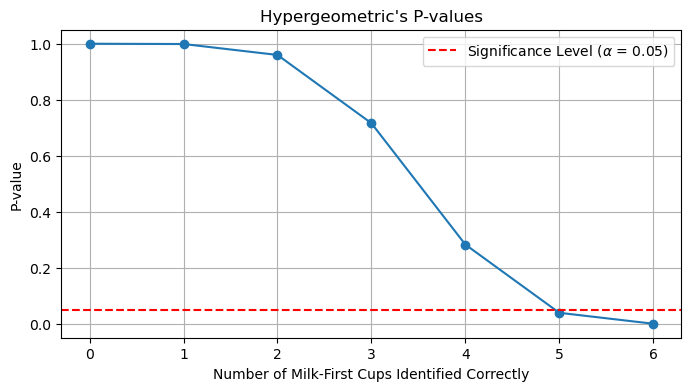

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(success_counts, p_values, marker='o')
ax.axhline(y=alpha, color='r', linestyle='--', label="Significance Level ($\\alpha$ = 0.05)")
ax.set_xlabel('Number of Milk-First Cups Identified Correctly')
ax.set_ylabel('P-value')
ax.set_title("Hypergeometric's P-values")
ax.set_xticks(success_counts)
ax.legend()
ax.grid()
plt.show()

The results are now clear: as the number of correctly chosen cups increases, the p-value decreases. This trend provides increasingly strong evidence against the null hypothesis. Remarkably,  even if she is permitted one mistake, selecting five out of six cups correctly still allows for a rejection of the null hypothesis, further supporting the argument for her exceptional ability. When she selects all six cups correctly, the evidence becomes even more compelling, solidifying the conclusion that her skill is significant and not attributable to random chance.

### References <a class="anchor" id="references"></a>

**$^1$** Zoltan Dienes (2008). "*Understanding Psychology as a Science, An introduction to scientific and statistical inference*". Palgrave Macmillan.

**$^2$** Learn Statistics Easily (2023). "*The Statistical Significance of the ‘Lady Tasting Tea’ Experiment*". [Learn Statistics Easily](https://statisticseasily.com/lady-tasting-tea/)

**$^3$** Fisher R. A. (1935). "*The Design of Experiments*". Chapter II: *The principles of experimentation illustrated by a psycho-physical experiment*, p.13 .Oliver and Boyd

**$^9$** Hayes A., Zhi V. H., Tarigan C. (n.d.). "*Combinatorics*. [Brilliant](https://brilliant.org/wiki/combinatorics/#permutations-and-combinations)

**$^{10}$** Frost J. (n.d.). "*Using Permutations to Calculate Probabilities*". [Statistics By Jim](https://statisticsbyjim.com/probability/permutations-probabilities/#:~:text=Permutations%20in%20probability%20theory%20and,order%20of%20numbers%20is%20crucial.)

**$^{11}$** Greeks for greeks (n.d). "*Circular Permutation*". [Greeks for greeks](https://www.geeksforgeeks.org/circular-permutation/)

**$^{12}$** Taylor S. (n.d.). "*Permutation*". [Corporate Finance Institute](https://corporatefinanceinstitute.com/resources/data-science/permutation/)

**$^{13}$** Library and Learning Center (n.d.). "*Statistics*". [Library and Learning Center](https://libraryguides.centennialcollege.ca/c.php?g=717168&p=5128089)

**$^{14}$** Greeks for greeks (2020). "*Python – math.comb() method*". [Greeks for greeks](https://www.geeksforgeeks.org/python-math-comb-method/)

**$^{15}$** Greeks for greeks (2024). "*Factorial in Maths*". [Greeks for greeks](https://www.geeksforgeeks.org/factorial/)

**$^{16}$** LabEx (n.d). "*How to use itertools.combinations in Python?*". [LabEx](https://labex.io/tutorials/python-how-to-use-itertools-combinations-in-python-398083)

**$^{17}$** Stackoverflow (2011). "*Python returning <itertools.combinations object at 0x10049b470> - How can I access this?*". [Stackoverflow](https://stackoverflow.com/questions/5176232/python-returning-itertools-combinations-object-at-0x10049b470-how-can-i-ac)

**$^{18}$** Hayes A., (2024). "*Simple Random Sampling: 6 Basic Steps With Examples*".[Investopedia](https://www.investopedia.com/terms/s/simple-random-sample.asp)

**$^{19}$** Python Documentation (n.d.). "*random — Generate pseudo-random numbers*". [Python Documentation](https://docs.python.org/3/library/random.html#random.sample)

**$^{20}$** Richardson J. T. E. (2021). "*Closer Look at the Lady Tasting Tea*". [Significance](https://doi.org/10.1111/1740-9713.01572), Volume 18, Pages 34–37.

**$^{21}$** Greeks for greeks (2024). "*How to count the frequency of unique values in NumPy array?*". [Greeks for greeks](https://www.geeksforgeeks.org/how-to-count-the-frequency-of-unique-values-in-numpy-array/)

**$^{22}$** Natarajan S. (2021). "*The Ultimate Guide to Hypothesis Testing for beginners*". [Medium](https://medium.com/analytics-vidhya/hypothesis-testing-a-simple-guide-fd08454d55f0)

**$^{23}$** Amanatullah (2023). "*A Comprehensive Guide to Hypothesis Testing: Understanding, Methods, and Applications*". [Medium](https://medium.com/@amanatulla1606/a-comprehensive-guide-to-hypothesis-testing-understanding-methods-and-applications-5e20dffce791)

**$^{24}$** Volchok E. (2020). "*Clear-Sighted Statistics: Module 13: Introduction to Null Hypothesis Significance Testing (NHST)*". [CUNY Queensborough Community College](https://academicworks.cuny.edu/cgi/viewcontent.cgi?article=1111&context=qb_oers#:~:text=The%20null%20hypothesis%20is%20a,process%20of%20nullification%20or%20falsification.&text=In%201925%2C%20the%20British%20statistician,Statistical%20Methods%20for%20Research%20Workers.)

**$^{25}$** Hora S. (2021). "*Understanding Hypothesis Testing*". [Towards Data Science](https://towardsdatascience.com/understanding-hypothesis-testing-65f9b3e9ab1f)

**$^{26}$** Verma N. (2023). "*One-tailed and Two-tailed Tests*". [Medium](https://medium.com/@nandiniverma78988/one-tailed-and-two-tailed-tests-df08e3721cfc) 

**$^{27}$** Modirshanechi A. (2020). "*Lady tasting tea: A Bayesian approach*". [Towards Data Science](https://towardsdatascience.com/lady-tasting-tea-a-bayesian-approach-1b0b94ca1530)

**$^{28}$** Beers B. (2024). "*P-Value: What It Is, How to Calculate It, and Examples*". [Investopedia](https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the,is%20generally%20considered%20statistically%20significant.)

**$^{29}$** Srivastava A. (2017). "*Types of Statistical Tests
*". [Medium](https://medium.com/@anushka.da3/types-of-statistical-tests-b8ceb90e13b3)

**$^{30}$** Turney S. (2022). "*Probability Distribution | Formula, Types, & Examples*". [Scribbr](https://www.scribbr.com/statistics/probability-distributions/#:~:text=A%20probability%20distribution%20is%20an,by%20its%20probability%20of%20occurrence)

**$^{31}$** Wroughton J., Cole T. (2013). "*Distinguishing Between Binomial, Hypergeometric and NegativeBinomial Distributions*". [Journal of Statistics Education, Volume 21, Number 1](https://jse.amstat.org/v21n1/wroughton.pdf)

**$^{32}$** Lenail A. (2017). "*Understanding and Implementing the hypergeometric test in python*". [Medium](https://alexlenail.medium.com/understanding-and-implementing-the-hypergeometric-test-in-python-a7db688a7458)

## Task 2: **Numpy's Normal Distribution**


### Table of Contents
1. [Problem Statement](#task2-1)

### 1. Problem Statement <a class="anchor" id="task2-1"></a>

> In this task you will assess whether `numpy.random.normal()` properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.
>
> Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution. Explain the results and output.
>
> Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

### 1. The Origins of the Normal Distribution

The concept of the **normal distribution** has its roots in the pioneering work of **Abraham de Moivre** (1667–1754), a *prominent statistician of the 18th century* who made significant contributions to probability theory, especially through his analysis of repeated, independent events in gambling, such as coin flips. De Moivre discovered that as the number of trials in these experiments increased, the shape of the binomial distribution of outcomes began to resemble a smooth, symmetric, bell-shaped curve. *This curve*, which later became known as the normal distribution, allowed him to **approximate binomial probabilities with a continuous function**, simplifying the calculation of probabilities for large numbers of events. *In 1733*, de Moivre first published his findings in Latin, introducing what is now recognized as the **central limit theorem**. He later translated this work into English in his book, **The Doctrine of Chances** (1738). De Moivre's insights laid the groundwork for future statisticians like **Pierre-Simon Laplace**, who applied the normal curve to the *analysis of measurement errors*, noting that random fluctuations often followed this bell-shaped pattern. Building on these foundations, **Carl Friedrich Gauss** further developed the normal distribution, especially in his studies of *astronomical data*, where observed measurements tended to cluster around true values with random deviations. *Due to Gauss's substantial contributions*, the normal distribution is also referred to as the **Gaussian distribution** **$^1$**.

### 2. Normal Distribution

The normal distribution is a continuous probability distribution that is symmetric about its mean. This means that it describes the probabilities of a continuous random variable, where values can take on any real number within a given range. The symmetry of the normal distribution indicates that data points close to the mean occur more frequently than those farther away. In this distribution, the mean (average), median (middle value), and mode (most frequent value) are all identical and located at the center, resulting in the characteristic "bell curve" shape when graphed. This model describes how the values of a variable are likely to be distributed, making the normal distribution a fundamental concept in statistics. It is especially significant because it accurately represents a wide range of natural phenomena, from biological measurements to social science data. Moreover, it serves as the foundation for many statistical methods and analyses, including hypothesis testing and confidence intervals, due to the central limit theorem, which states that the sum of a large number of independent random variables will tend to follow a normal distribution, regardless of the original distribution of the variables.

The normal distribution is characterized by two key parameters: 
- the mean ($\mu$): It represents the central tendency or average of the distribution, indicating where the highest point of the curve lies
- the standard deviation ($\sigma$): the standard deviation measures the spread or dispersion of the data around the mean, with larger values indicating a wider distribution and smaller values indicating a more concentrated distribution **$^2$**.

To gain a deeper understanding of how data is distributed in a normal distribution, we can apply the Empirical Rule, commonly referred to as the 68-95-99.7 rule or the three-sigma rule. This principle is based on the observation that nearly all data points in a normal distribution lie within three standard deviations from the mean. Specifically, the rule indicates that:

- approximately $68%$ of the data falls within one standard deviation ($\pm 1\sigma$) of the mean,
- about $95%$ of the data falls within two standard deviations ($\pm 2\sigma$) 
- and nearly $99.7%$ of the data lies within three standard deviations ($\pm 3\sigma$).

By using this rule, we can quickly assess the spread and variability of the data, allowing us to make inferences about the likelihood of data points falling within specific ranges **$^3$**.   


### 3. Python code

Having gained a clearer understanding of the normal distribution, we can now proceed to generate some normal values and examine whether they conform to the characteristics of a normal distribution. To achieve this, we will use the `random.normal()` from the NumPy library. According to the NumPy documentation, this function generates samples from a normal  distribution, which is specified by a mean (loc) and a standard deviation (scale). By generating these random values, we can analyze their distribution and assess whether they align with the theoretical properties of a normal distribution, such as symmetry, the bell-shaped curve, and the empirical rule **$^4$**.

In [13]:
# define Mean and Standard Deviation
mu = 10.0
sigma = 3.0
sample_size = 100000

random_sample = np.random.normal(loc=mu, scale=sigma, size=sample_size)

print(f"Generated a sample of {sample_size} values with mean {mu} and standard deviation {sigma}.")
print(f"The Random Values are:\n {random_sample}")

Generated a sample of 100000 values with mean 10.0 and standard deviation 3.0.
The Random Values are:
 [11.40678321  8.35152245 11.97134935 ...  9.10967848 10.74779489
 15.35964156]


Evaluating normality typically involves two main approaches: graphical methods and statistical tests. Each approach has unique strengths and limitations, contributing to a comprehensive understanding of the data's distribution **$^6$**.

#### Assessing Normality: Graphical Approach

Let’s begin with a graphical approach, which provides a comprehensive visual assessment of normality and enhances our understanding of data distributions. These techniques can reveal patterns or deviations that may be overlooked in purely numerical analyses. One of the most commonly used graphical methods is the histogram. Histograms are particularly effective because they offer a clear and intuitive representation of the frequency distribution of data. Unlike bar charts, which are primarily used for categorical data, histograms are specifically designed to display the distribution of continuous variables. This allows us to visualize how data points are spread across various intervals, known as "bins". The visual representation provided by histograms enables us to discern the overall shape of the distribution, revealing whether it is symmetric, skewed, or exhibits multiple peaks (modes). One of the primary advantages of using histograms is their ability to facilitate a quick visual assessment of normality. By simply observing the shape of the histogram, we can quickly gauge if the data approximates a normal distribution or if there are significant deviations, such as skewness (asymmetry) or kurtosis (peakedness). Moreover, the choice of bin width in a histogram offers flexibility regarding the level of detail displayed. By adjusting the number of bins, we can emphasize different aspects of the distribution. A larger bin width provides a broad overview of the data, while a smaller bin width allows for a more detailed examination of specific value ranges, highlighting nuances that may otherwise go unnoticed. This adaptability makes histograms a powerful tool for assessing normality and understanding the underlying structure of the data **$^7$**.



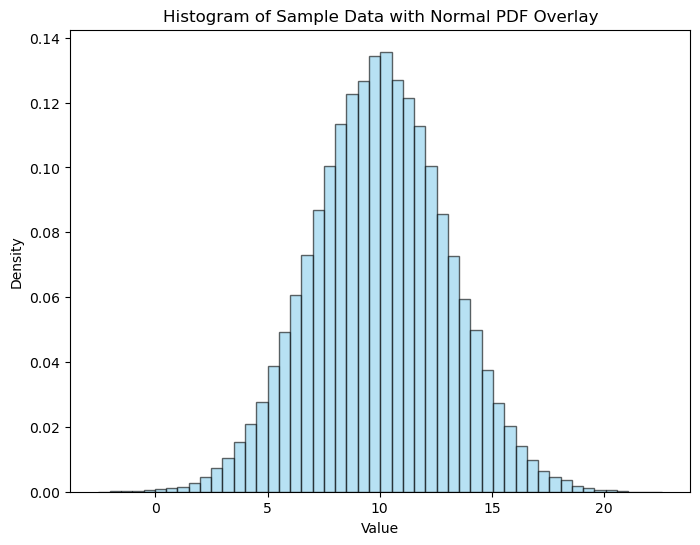

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(random_sample, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
ax.set_title("Histogram of Sample Data with Normal PDF Overlay")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
plt.show()


Based on an initial analysis of the histogram, the data appears to follow a normal distribution. This conclusion is supported by the symmetric, bell-shaped curve that is centered around the mean. The symmetry suggests that the values are evenly distributed around the central tendency, with the majority of observations clustered near the mean. 

#### 3.1 Probability Density Function (PDF)

Having generated a set of normally distributed values, we now turn our attention to the Probability Density Function (PDF), a fundamental concept that describes the likelihood of a continuous random variable taking on a specific value. The PDF serves as another valuable graphical approach for analyzing data distributions. For the normal distribution, the PDF is characterized by its bell-shaped curve, which encapsulates the central tendencies of the data. Mathematically, the PDF of a normal distribution is expressed using the following formula:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

Where:
- $\mu$ is the mean of the distribution;
- $\sigma$ is the standard deviation;
- $\sigma^2$ is the variance. It quantifies how much the values in a distribution deviate from the mean.
- $e$ is Euler's number, approximately equal to 2.71828 **$^5$**.

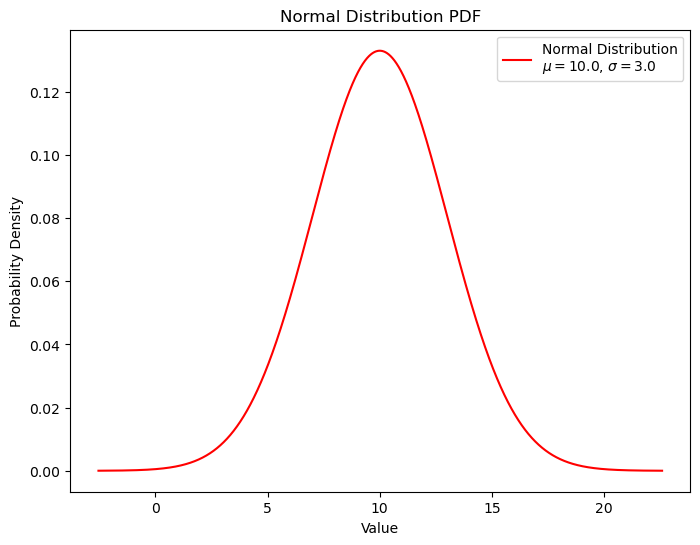

In [15]:
def normal_pdf(x, mu, sigma):
    return (1 / (math.sqrt(2 * math.pi) * sigma)) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)


# Generate a range of x values
x_values = np.linspace(min(random_sample), max(random_sample), 100000)

# Calculate the PDF for each x value
pdf_values = [normal_pdf(x, mu, sigma) for x in x_values]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_values, pdf_values, color='r', label=f'Normal Distribution\n$\mu={mu}$, $\sigma={sigma}$')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.set_title('Normal Distribution PDF')
ax.legend()
plt.show()

Having visualized both the histogram and the probability density function (PDF), we can now create an additional visualization that overlays these two graphs for a more comprehensive comparison. This combined graphical representation allows us to assess how closely the observed data aligns with the expected normal distribution. By overlaying the histogram with the PDF, we can easily identify significant deviations, such as skewness, which indicates the asymmetry of the distribution, and kurtosis, which reflects the peakedness of the distribution.

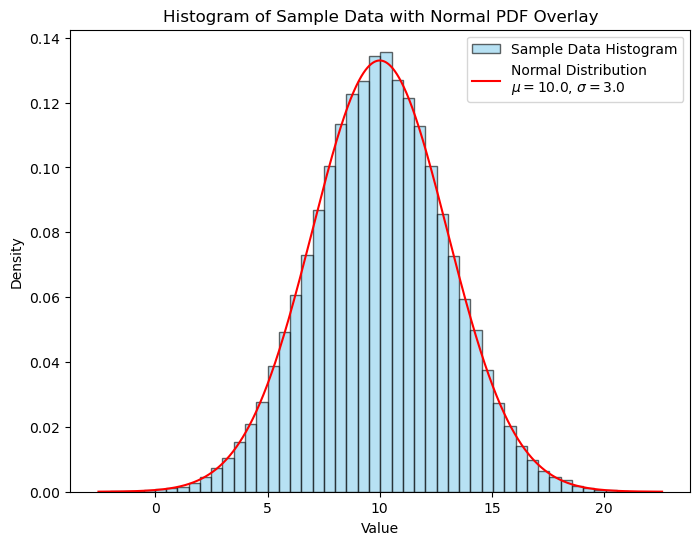

In [16]:
# Plot both the histogram and PDF
fig, ax = plt.subplots(figsize=(8, 6))
# Histogram of the sample data
ax.hist(random_sample, bins=50, density=True, alpha=0.6, color='skyblue',  edgecolor='black',  label='Sample Data Histogram')
# PDF line plot
ax.plot(x_values, pdf_values, color='r', label=f'Normal Distribution\n$\mu={mu}$, $\sigma={sigma}$')
ax.set_title("Histogram of Sample Data with Normal PDF Overlay")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.legend()
plt.show()


One final graphical approach to determine if our data follows a normal distribution is the QQ (Quantile-Quantile) plot. This plot compares the quantiles of our dataset with the theoretical quantiles of a normal distribution, allowing us to visually assess whether the data aligns with the normal distribution. If the points closely follow a straight line, it suggests that our data is approximately normally distributed. Deviations from the line indicate potential departures from normality **$^a$**. 

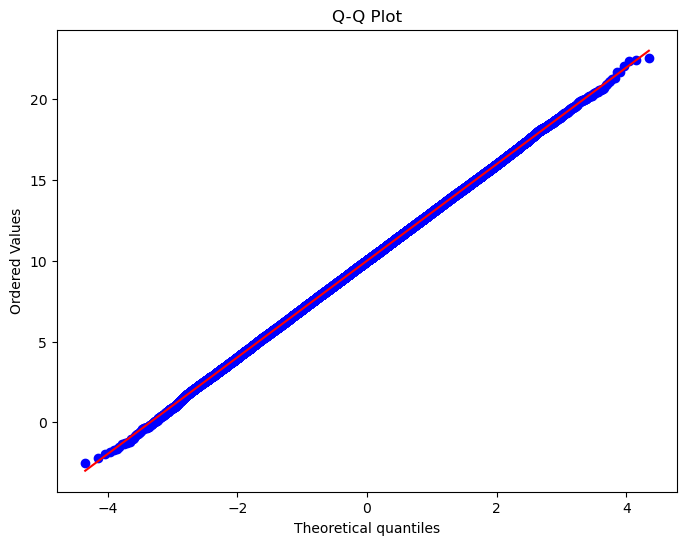

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

stats.probplot(random_sample, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.show()

The above plot shows that the data points (in blue) align closely with the red reference line, which represents a perfect fit to a normal distribution. This alignment suggests that the sample data likely follows a normal distribution, as there are minimal deviations from the line throughout the range of quantiles.

#### Assessing Normality: Statistical method

Our preliminary visual inspection suggests the data aligns well with a normal distribution. However, to ensure a reliable evaluation, we must support this observation with quantitative methods that extend beyond subjective interpretation. To rigorously assess the assumption of normality, we can apply statistical normality tests designed to determine if a sample likely originates from a normally distributed population, providing an objective perspective to complement our initial visual findings. For continuous data, several common statistical tests are available for normality assessment, including the Shapiro–Wilk test, the Kolmogorov–Smirnov test, and additional metrics such as skewness and kurtosis. These tests quantify the extent to which the data deviates from a normal distribution, offering valuable insights into its characteristics **$^8$**.

#### Shapiro–Wilk test

As mentioned in the previous paragraph, the Shapiro-Wilk test is a statistical procedure designed to assess how closely a sample of data approximates a normal distribution. This test was developed by Samuel Sanford Shapiro and Martin Wilk in 1965 and was first presented in their influential paper titled "An Analysis of Variance Test for Normality". They stated:

>The main intent of this paper is to introduce a new statistical procedure for testing a complete sample for normality. The test statistic is obtained by dividing the square of an appropriate linear combination of the sample order statistics by the usual symmetric estimate of variance. This ratio is both scale and origin invariant and hence the statistic is appropriate for a test of the composite hypothesis of normality. Testing for distributional assumptions in general and for normality in particular has been a major area of continuing statistical research—both theoretically and practically. A possible cause of such sustained interest is that many statistical procedures have been derived based on particular distributional assumptions—especially that of normality (Shapiro, Wilk, 1965. p.591) **$^9$**.

Furthermore, they highlighted the effectiveness of their approach, noting that,

> The object of the W test is to provide an index or test statistic to evaluate the supposed normality of a complete sample. The statistic has been shown to be an effective measure of normality even for small samples (n < 20) against a wide spectrum of non-normal alternatives. The W statistic is scale and origin invariant and hence supplies a test of the composite null hypothesis of normality (Shapiro, Wilk, 1965. p.602) **$^9$**.

When conducting the test with a significance level set at 0.05, a p-value that exceeds this threshold leads us to fail to reject the null hypothesis. This outcome suggests that there is insufficient evidence to assert that the data deviates from a normal distribution, thereby allowing us to reasonably assume that the data adheres to the characteristics of a normal distribution. In contrast, if the p-value is less than or equal to 0.05, we would reject the null hypothesis, indicating that the data likely does not follow a normal distribution, which may necessitate the use of different statistical methods for further analysis **$^{10}$**.


To conduct the Shapiro-Wilk test in Python, we can utilize the `shapiro()` function from the SciPy package. This function requires an input array x, which represents the sample data we want to test for normality. Upon execution, `shapiro()` returns two key outputs: the test statistic and the p-value. The test statistic indicates the degree to which the sample deviates from a normal distribution, while the p-value provides the probability of observing the data given that the null hypothesis is true **$^{11}$**. 


In [18]:
statistic, pvalue = stats.shapiro(random_sample)
# interpret the test
alpha= 0.05
print(f'stat= {statistic}\np={pvalue}')
if pvalue > alpha:
    print('The sample looks Gaussian (fail to reject H0)')
else:
    print('The sample does not look Gaussian (reject H0)')

stat= 0.9999756813049316
p=0.7979387044906616
The sample looks Gaussian (fail to reject H0)


d:\Users\fratr\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


While conducting the Shapiro-Wilk test, we encountered a warning that suggests the p-value produced may not be reliable for sample sizes greater than 5000 observations (N > 5000). This warning highlights an important limitation of the test: as the sample size increases, its sensitivity also rises, potentially compromising the accuracy of the p-value. Consequently, it is essential to interpret the results with caution when dealing with large datasets, as the test may indicate statistical significance even in cases where it may not be practically relevant **$^{11}$**.

To gain a clearer understanding of the results and determine whether we can fail to reject the null hypothesis, we need to analyze the statistic value from the Shapiro-Wilk test. Ideally, this statistic should equal 1 **$^{10}$**. In our analysis, we observe that the statistic value is approximately 0.99, indicating a close proximity to 1. Additionally, the p-value is significantly higher than the 0.05 significance level, coming in at 0.95. Therefore, we can conclude that the data does not significantly deviate from a normal distribution, supporting the validity of the null hypothesis.

### Other Statistical Test

To validate the accuracy of the information obtained from the Shapiro-Wilk test and ensure that errors haven't been introduced due to the large sample size, we can attempt to confirm or reject the null hypothesis by applying an additional statistical test: the Kolmogorov–Smirnov (K-S) test. It is a widely-used non-parametric test designed to evaluate whether a sample originates from a specified distribution by examining cumulative distribution functions (CDFs). Unlike parametric tests, the K–S test does not require assumptions about the specific shape of the distribution, making it particularly versatile for testing hypotheses about distributional patterns. Developed as part of foundational research in probability theory, the test is named after mathematicians Andrey Kolmogorov and Nikolai Smirnov, who made significant contributions to its formulation in the 1930s and 1940s. The K–S test originated with Kolmogorov’s 1933 work, "Sulla determinazione empirica di una legge di distribuzione", in which he introduced the concept of the empirical cumulative distribution (ECD) and proposed a test statistic based on the maximum difference between the ECD and the theoretical cumulative distribution (TCD). Kolmogorov aimed to determine how well empirical data aligned with a theoretical distribution without presupposing a specific form. In 1939, Nikolai Smirnov, working independently, further advanced this non-parametric approach in his article, Estimation of the Difference Between Empirical Distribution Functions in Two Independent Samples. Smirnov proposed a method for comparing two independent samples by defining a test statistic based on the maximum difference between their respective empirical cumulative distributions. Recognizing the similarity between their approaches, Kolmogorov and Smirnov combined their efforts, leading to the unified formulation known today as the Kolmogorov-Smirnov Test **$^{12}$**

In Python, the Kolmogorov-Smirnov (K-S) test can be conducted using the `kstest()` function from the scipy.stats module. This function is particularly suited for performing a one-sample K-S test, as in our case. The purpose of using this test is to compare the sample distribution with a specified theoretical distribution, such as the normal distribution. This test is particularly suitable for larger sample sizes, as it assesses the alignment between the observed distribution and the expected distribution.  

The function takes three main arguments:

- The sample data: Here, we use random_sample, representing the data we wish to test.
- The hypothesized distribution: In this case, we specify 'norm' to test if our sample approximates a normal distribution.
- Distribution parameters: We provide the mean and standard deviation of the normal distribution as additional parameters. These define the specific normal distribution that our sample is tested against **$^{13}$**

In [19]:
# using the same mean and standard deviation as before (mu=10.0, sigma=3.0)
ks_statistic, p_value = kstest(random_sample, 'norm', args=(mu, sigma))

print(f"K-S Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H0: the sample does not follow a normal distribution.")
else:
    print("Fail to reject H0: the sample is consistent with a normal distribution.")

K-S Statistic: 0.0028294228178106784
P-value: 0.39929639876230794
Fail to reject H0: the sample is consistent with a normal distribution.


The test results provide two key measures:

- **K-S Statistic**: This statistic quantifies the maximum difference between the empirical cumulative distribution function of the sample and the cumulative distribution function of the hypothesized distribution.
- **P-value**: This value indicates the statistical significance of the observed difference **$^{13}$**.

In this case, the K-S statistic is very small (0.0033), indicating a close alignment between the sample data and the normal distribution. The p-value (0.2202) is greater than the typical significance level of 0.05. This indicates that we fail to reject the null hypothesis that the sample data comes from a normal distribution. In other words, there is no significant evidence to suggest that the sample data deviates from a normal distribution.

After conducting two distinct statistical tests on our sample, we have increased confidence in concluding that the sample follows a normal distribution. This confirmation also supports the accuracy of the overlay between the probability density function (PDF) and the sample histogram, reinforcing our initial observation of normality in the data.

### References

**$^1$** Lane D. (2022). "*7.2: History of the Normal Distribution*". [LibreTexts Statistics](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_%28Lane%29/07%3A_Normal_Distribution/7.02%3A_History_of_the_Normal_Distribution)

**$^2$** Chen J. (2024). "*Normal Distribution: What It Is, Uses, and Formula*". [investopedia](https://www.investopedia.com/terms/n/normaldistribution.asp#:~:text=Error%20Code%3A%20100013)

**$^3$** Frost J. (n.d.). "*Empirical Rule: Definition & Formula*". [Statistics by Jim](https://statisticsbyjim.com/probability/empirical-rule/)

**$^4$** Numpy Documentation (n.d.). "*numpy.random.normal*". [Numpy](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html)

**$^5$** Medium (2020). "*Normal Distribution: Probability Density Function Derivation*". [Medium](https://medium.com/@curiousincosmos/normal-distribution-probability-density-function-derivation-872c4f9d514d)

**$^6$** Mishra P., Pandey M. C., Singh U., Gupta A., Sahu C., Keshri A. (2019). "*Descriptive Statistics and Normality Tests for Statistical Data*". [Annals of cardiac anaesthesia, 22(1), 67–72](https://pmc.ncbi.nlm.nih.gov/articles/PMC6350423/#:~:text=The%20two%20well%2Dknown%20tests,%E2%86%92%20normality%20plots%20with%20tests)

**$^7$** Velez A. (2021). "*differences between histograms and bar charts*". [Storytelling with Data](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts)

**$^8$** DATAtab Team (2024). "*Normality test*". [DATAtab](https://datatab.net/tutorial/test-of-normality)

**$^9$** Shapiro, S. S., & Wilk, M. B. (1965). "*An Analysis of Variance Test for Normality*". [Biometrika](doi:10.2307/2333709)

**$^{10}$** Humaizi A. (2024). "*10.0 Shapiro-Wilk test*".[Medium](https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6#:~:text=Technically%2C%20the%20Shapiro%2DWilk%20test,data%20follow%20a%20normal%20distribution.)

**$^{11}$** Scipy Documentation (n.d). "*Shapiro*". [Scipy](https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html#shapiro)

**$^{12}$** Melanie (2024). "*Kolmogorov-Smirnov Test: Understanding this Statistical Method*". [Datascientest](https://datascientest.com/en/kolmogorov-smirnov-test-understanding-this-statistical-method)

**$^{13}$** Scipy Documentation (n.d.). "*kstest*".[Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

**$^a$** Statistics & Acturial Science (n.d.). "*ECDF, QQ, and PP Plots*". [Statistics & Acturial Science](https://homepage.divms.uiowa.edu/~luke/classes/STAT4580/qqpp.html#:~:text=Both%20QQ%20and%20PP%20plots,standard%20member%20of%20the%20family.)

## Task 3: **t-Test Calculation**


### Table of Contents
1. [Problem Statement](#task3-1)

### 1. Problem Statement <a class="anchor" id="task3-1"></a>

> Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.
 
 | Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
 | -----------| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
 | Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
 | After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

> Calculate the t-statistic based on this data set, using Python. Compare it to the value given by `scipy.stats`. Explain your work and list any sources used.


#### T-Test Introduction

After graduation, he joined Guinness Brewery in Dublin as a brewery master, where he applied his expertise as both a chemist and statistician. At Guinness, his responsibilities included assessing the quality of key ingredients like hops and barley. Around the beginning of the 20th century, Guinness began hiring Oxford and Cambridge graduates to bring scientific rigor to beer production, and Gosset proved to be a valuable asset in this effort. By 1904, Gosset had presented a plan to the brewery's supervisory board, proposing the use of statistical methods, including the law of error, to enhance the production process. Throughout his career, Gosset engaged with academic circles, where he deepened his understanding of theoretical concepts such as Bayesian probability, Gaussian (normal) distribution, Laplace's work, and the central limit theorem, all of which rely on large sample sizes for accurate analysis. However, the practical challenges of brewing often involved small sample sizes, such as assessing the effects of fermentation temperature on beer acidity, where data was limited to fewer than five measurements. Faced with the need to make valid inferences from small data sets, Gosset developed the t-test **$^1$**. 

In 1908, William Sealy Gosset introduced the t-test in a groundbreaking paper titled "The Probable Error of a Mean," published in the journal Biometrika. Unusually, Gosset did not publish this work under his own name but rather under the pseudonym "Student." This decision was not personal but a consequence of his employment at the Guinness Brewery, which imposed a strict policy prohibiting employees from publishing under their real names to protect the brewery's proprietary interests. Under this policy, and with guidance from the brewery’s director, Gosset adopted the pseudonym “Student” to remain in compliance. This is why the t-test is widely known today as the "Student's t-test."

Confirmation of Gosset's identity as "Student" comes from a paper titled British Statistics and Statisticians Today, written by Harold Hotelling and published in the Journal of the American Statistical Association. Hotelling addresses longstanding speculation among American statisticians about the true identity of "Student," with guesses ranging from Egon Pearson to even the Prince of Wales. Hotelling clarifies:

>American students of statistics have long speculated as to the identity of "Student [...] I have heard guesses in this country identifying "Student" with Egon S. Pearson and with the Prince of Wales. He is now so well known in Great Britain that no confidence is violated in revealing that he is W. S. Gosset, a research chemist employed by a large Dublin brewery. This concern years ago adopted a rule forbidding its chemists to publish their findings. Gosset pleaded that his mathematical and philosophical conclusions were of no possible practical use to competing brewers, and finally was allowed to publish them, but under a pseudonym, to avoid difficulties with the rest of the staff (Hotelling (1930), p.189)**$^2$**.

In "The Probable Error of a Mean," we gain insight into the challenges Gosset faced when working with small sample sizes, where assuming a normal distribution could be problematic:

> If the number of experiments be very large, we may gave precise information as to the value of the mean, but if our sample be small, we have two sources of uncertainty: -(1) owing to the “error of random sampling” the mean of our series of experiments deviates more or less widely from the mean of the population. and (2) the sample is not sufficiently large to determine what is the law of distribution of individuals. It is usual, however, to assume a normal distribution, because, in a very large number of cases, this gives an approximation so close that a small sample will give no real information as to the manner in which the population deviates from normality […] Again, although it is well known that the method of using the normal curve is only trustworthy when the sample is “large”, no one has yet told us very clearly here the limit between “large” and “small” samples is to be drawn. The aim of the present paper is to determine the point at which we may use the tables of the probability integral in judging of the significance of the mean of a series of experiments, and to furnish alternative tables for use when the number of experiments is too few (Gosset (1908), p1-2) **$^3$**.

### T-Test explanation

Now that we've provided some background on the origins and purpose behind the creation of the T-test, let's delve deeper into what a T-test is, when it should be applied, and how to effectively use it.  A t-test is a statistical method used to assess whether there is a significant difference between the means of two groups or between a sample mean and a known or hypothesized population mean. This test is especially valuable for small samples, helping to determine whether observed differences are likely due to chance or reflect real variation between groups. There are three main types of t-tests:

- One-sample t-test
- Paired sample t-test
- Independent two-sample t-test 

As a hypothesis test, a T-test involves two main hypotheses:

- Null Hypothesis ($H_0$): Proposes that there is no significant difference between the means; any observed difference is due to random variability.
- Alternative Hypothesis ($H_1$): Argues that there is a significant difference between the means, suggesting that the observed differences are not due to random variation.

In addition to these hypotheses, several assumptions must be met for a valid t-test:

- The data should be continuous.
- The samples must be randomly drawn from the population.
- The observations within each sample must be independent of one another (except in the case of paired samples, where there is a relationship between observations).
- The data should follow an approximately normal distribution, particularly for small sample sizes.**$^4$**.
  
By understanding the mechanics of the different types of T-tests and their assumptions, we can make more informed decisions about which test is best suited to analyze our specific task.

### One Sample T-test

The one-sample t-test is used to compare the mean of a single sample to a known or hypothesized population mean. It helps to determine whether the sample mean significantly differs from the population mean.

The formula for the one-sample t-test is:

$$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$

where:
- $\bar{x}$ is the sample mean
- $\mu_0$ is the hypothesized population mean being tested
- $s$ is the sample standard deviation
- $n$ is the sample size **$^5$**.

### Paired sample t-test

The paired t-test, also known as the dependent samples t-test, is a statistical method used to compare the means of two related groups. These groups typically consist of measurements taken from the same subjects at two different points in time or under two distinct conditions. The purpose of this test is to determine if the difference between the means of these two related groups is statistically significant. Since the data are paired, each data point in one group corresponds to a data point in the other group. 
  
The formula for the paired t-test is:

$$t = \frac{\bar{d}}{s_d / \sqrt{n}}$$

Where:
- $\bar{d}$ is the mean of the differences between each pair of observations.
- $s_d$ is the standard deviation of the differences between the paired measurements.
- $n$ is the number of pairs **$^6$**. 

### Independent two-sample t-test

The independent two-sample t-test is used to compare the means of two independent groups, where the participants or observations in one group do not influence the observations in the other group. This test is commonly used to determine if there is a significant difference between the groups on a particular variable. 
The formula for the paired t-test is:

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

where:
- $\bar{X}_1$ and $\bar{X}_2$ are the sample means.
- $n_1$ and $n_2$ are the sample sizes.
- ${s_1^2}$ and ${s_2^2}$ are the sample variances of the two gorups **$^7$**.

Now that we have a clear understanding of the three types of T-tests, we can begin determining which one is appropriate for our task. The objective of this analysis is to compare the resting heart rates of patients before and after they participate in a two-week exercise program. The first thing to note is that the measurements are taken from the same group of patients at two different points in time. Specifically, we have two sets of data: one representing resting heart rates before the program, and the other representing the heart rates after the program. Since the same individuals are measured before and after the exercise program, the data is considered dependent. This dependency between the two sets of measurements suggests that the appropriate statistical test for analyzing the data is the Paired Sample t-Test.

Let's focus on understanding our data and the options we have for organizing and analyzing it. We can approach this task in two main ways: using arrays from the array or numpy libraries, or creating a DataFrame with the pandas library. Arrays are basic data structures that store elements sequentially, making them ideal for simple calculations. With arrays, we could set up two separate lists for "Before" and "After" heart rates and then use basic operations to compute statistics, such as the mean heart rate for each list or the differences between values. However, arrays lack a built-in system for labeling or organizing data by columns, which can become limiting as our data grows or as we add more variables. On the other hand, a DataFrame offers a more structured and versatile approach to data analysis. DataFrames allow us to assign clear labels to columns, making our data more immediately understandable. For instance, in addition to "Before" and "After" heart rates, we could add a "Difference" column to store the change in heart rates after an exercise program. This structure enhances readability and allows us to track multiple variables effortlessly. They also include built-in functions for calculating statistics across columns, enabling more efficient and comprehensive analysis. With DataFrames, we also gain access to tools for data visualization, making it easier to spot trends or patterns within the dataset **$^8$**.



In [20]:
# create a new dictionary
heart_rates = {
    "before" : [63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
    "after" : [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]
}

# convert the dictionary to a DataFrame
df = pd.DataFrame(heart_rates)

#visualize the data
df


,before,after
0,63,64
1,68,64
2,70,68
3,64,64
4,74,73
5,67,70
6,70,72
7,57,54
8,66,61
9,65,63


To obtain descriptive statistics that include measures of central tendency, dispersion, and the shape of a dataset's distribution, the describe function can be used. This function provides a summary of key statistical metrics, such as the mean, median, standard deviation, and skewness, giving a comprehensive overview of the data’s characteristics **$^9$**.

In [21]:
df.describe()

,before,after
count,10.00000,10.000000
mean,66.40000,65.300000
std,4.64758,5.677441
min,57.00000,54.000000
25%,64.25000,63.250000
50%,66.50000,64.000000
75%,69.50000,69.500000
max,74.00000,73.000000


Before conducting the T-test, it's essential to visualize the data to better understand its distribution and underlying characteristics. This visualization step provides a comprehensive overview that enables us to identify patterns, trends, outliers, or anomalies that may impact the results. For instance, when analyzing a dataset of heart rates before and after an exercise program, plotting the data helps us quickly spot any noticeable shifts or trends between the "Before" and "After" conditions, as well as detect potential outliers. Utilizing visualizations like boxplots or line plots can reveal whether the heart rates are consistent across the two conditions or if there is a distinct change post-program. Additionally, visualizations can help us assess if the data meets the key assumptions of the T-test, such as normality and the absence of significant outliers. If visualizations show that the data is skewed or contains outliers, it may be necessary to reconsider the use of the T-test, apply data transformations, or explore non-parametric alternatives before proceeding with the analysis.

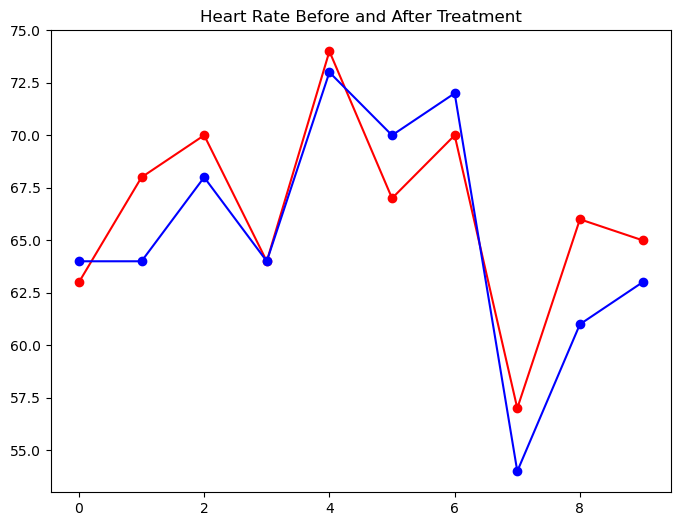

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df['before'], color='r', marker='o', linestyle='-', label='Before')
ax.plot(df['after'], color='b', marker='o', linestyle='-', label='After')
ax.set_title('Heart Rate Before and After Treatment')
plt.show()

The first plot we will use to visualize the statistical data is the boxplot, a powerful tool for summarizing the distribution of a dataset. This visualization allows us to quickly assess the central tendency, spread, and any potential outliers for each group ("Before" and "After" in our case). Key components of the boxplot include the minimum and maximum values (the lowest and highest data points within 1.5 times the interquartile range, or IQR), the first quartile (or 25th percentile), the median (the central line within each box representing the midpoint of the data), and the third quartile (or 75th percentile). The box itself spans the IQR, capturing the middle 50% of data values and indicating the spread around the median. The whiskers extend from the first to the third quartile, covering values within 1.5 times the IQR, while any points beyond this range are marked as outliers, highlighting extreme values in the dataset **$^{10}$**.

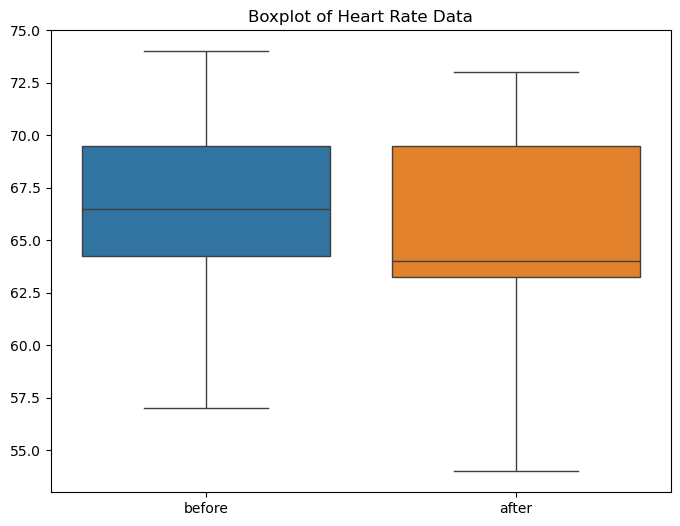

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, ax=ax)
ax.set_title("Boxplot of Heart Rate Data")
plt.show()

The boxplot analysis above shows that the median heart rate for the "Before" exercise program group is slightly higher than that of the "After" group, indicating a potential reduction in central tendency of heart rates following the program. This observed decrease in median heart rate may suggest that the exercise intervention contributed to a mild improvement in cardiovascular efficiency, as indicated by a lower resting heart rate. Additionally, the interquartile range (IQR) for the "Before" group spans approximately 63 to 70 beats per minute (bpm), while the IQR for the "After" group appears to shift downward slightly, pointing to a reduction in heart rate variability post-exercise. This reduced variability might indicate a more consistent and stable heart rate among participants after completing the exercise program. Finally, the lack of outliers in either group suggests that there are no extreme values in this dataset, which helps ensure that our analysis is not influenced by any anomalous heart rate readings. 

While the boxplot offers a summarized view of the data distribution, the stripplot provides a detailed perspective by displaying each individual data point. This can be particularly valuable when working with smaller sample sizes, as it allows for a closer inspection of the data. A stripplot is a specialized form of scatter plot that visualizes one-dimensional data points along a single axis, providing insight into the distribution of a continuous variable. Unlike a typical scatter plot, the points in a stripplot are jittered to prevent overlap, making it easier to discern trends and outliers. These features make stripplots especially effective for identifying patterns and detecting anomalies in the dataset **$^{11}$**.

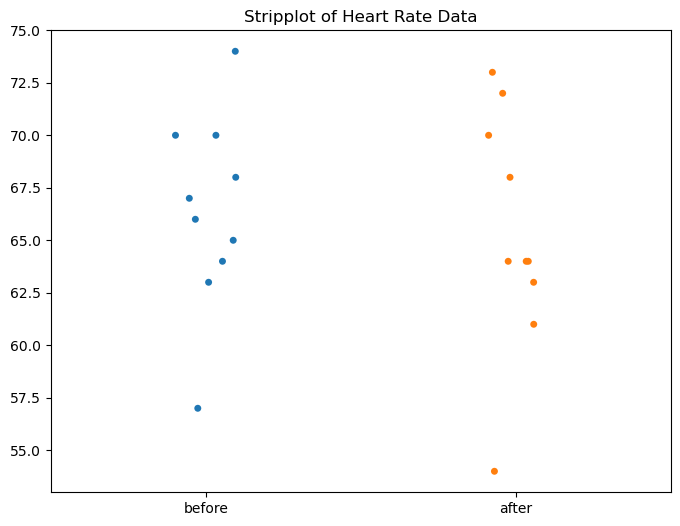

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=df, ax=ax)
ax.set_title("Stripplot of Heart Rate Data")
plt.show()

In the "Before" group, the heart rate values primarily fall within the 63 to 70 bpm range, with a single value at 57 bpm that stands out as an anomaly. This pattern suggests that most patients initially had moderately high resting heart rates, with some degree of individual variation. In contrast, the "After" group displays a noticeable shift, with a larger number of values now concentrated at or below 65 bpm. The recorded range in this group spans from a low of 54 bpm to a high of 73 bpm, indicating some degree of fluctuation following the program. When examining the stripplot, we can trace each patient's heart rate change, observing a general trend of reductions in resting heart rates for several individuals. However, there are exceptions where some patients either showed a slight increase in their heart rate or maintained a similar level to their initial measurement. These differences may reflect individual responses to the exercise program or the influence of external factors that could impact heart rate, such as lifestyle changes or health conditions.

So now we can start talking about the assumption that we see in the previous paragraph. For a paired t-test, we assume the differences between paired values (i.e., "Before" minus "After" for each patient) are approximately normally distributed. While boxplots and stripplots do not directly show normality, they allow us to see if there are major deviations or extreme values that could impact normality. By visualizing, we gain an immediate sense of any potential effect of the intervention (exercise program). In this case, the median shift and clustering of lower values in the "After" group suggest a possible effect, which we would want to confirm with a statistical test. Extreme values or outliers can distort the results of a t-test. By inspecting the boxplot and stripplot, we can confirm that there are no apparent outliers in this dataset, which adds confidence to our assumption that the t-test will yield a reliable result.

Based on the visualizations, it appears that the exercise program may have contributed to a reduction in heart rates for several patients. However, not all individuals experienced the same outcome, suggesting variability in how participants responded to the program. These observations provide a basis for further investigation. With these insights, we are now prepared to conduct a paired t-test to assess whether the changes in resting heart rates are statistically significant. Before proceeding, let's clearly state our null hypothesis: The exercise program has no effect on the mean resting heart rate, meaning there is no difference between the heart rates before and after the program. This can be mathematically expressed as: 

$$H_0 : \mu_{before} = \mu_{after}$$
​


To test the validity of the null hypothesis ($H_0$), we will follow the methodology outlined in Shier R.'s 2004 article "Statistics: 1.1 Paired t-tests **$^{12}$**" for conducting a t-test. This will involve a series of steps for analysis and calculation, which will be implemented through Python code to ensure accurate results.


1. We begin by computing the change in heart rate between the "before" and "after" measurements for each individual. TThis difference provides insights into the variation in heart rate, reflecting both increases and decreases as a result of the exercise program.  To keep track of these changes, a new column will be added to our dataset to store the calculated differences for further analysis.

In [25]:
# creating a new column to store the difference between the before and after values
df['Difference'] = df['before'] - df['after']
print(f"The new DataFrame with the difference column\n {df}")

The new DataFrame with the difference column
    before  after  Difference
0      63     64          -1
1      68     64           4
2      70     68           2
3      64     64           0
4      74     73           1
5      67     70          -3
6      70     72          -2
7      57     54           3
8      66     61           5
9      65     63           2


1. Next, we compute the mean ($\bar{d}$) and the standard deviation ($s_d$) of the difference column. The mean provides an average value that reflects the overall change in heart rates after the program, while the standard deviation measures the variability or dispersion of the individual differences from the mean.

In [26]:
# compute the mean
mean_difference = df['Difference'].mean()
# compute the standard deviation
std_dev_difference = df['Difference'].std()

print(f"Mean of Differences: {mean_difference}")
print(f"Standard Deviation of Differences: {std_dev_difference}")


Mean of Differences: 1.1
Standard Deviation of Differences: 2.601281735350223


3. Using this information, we can calculate the standard error of the mean difference. This is done by dividing the standard deviation of the differences by the square root of the sample size:

$$SE(\bar d) = \frac {s_d}{\sqrt{n}}$$   

The standard error measures the precision with which the sample mean difference estimates the true population mean difference.

In [27]:

# Number of observations
n = len(df)

# Calculate the standard error of the mean difference
standard_error = std_dev_difference / np.sqrt(n)
print(f"Standard Error of the Mean Difference: {standard_error}")

Standard Error of the Mean Difference: 0.8225975119502045


4. calculate the T-statistic, which quantifies the difference between the means of the paired groups in terms of standard error

In [28]:
# calculate the t-statistic
t_statistic = mean_difference / standard_error
print(f"T-Statistic (T): {t_statistic}")

T-Statistic (T): 1.3372274824806278


5. Finally, we calculate the p-value to assess the statistical significance of the observed mean difference. To do this, we compare the calculated t-statistic against the t-distribution with n−1 degrees of freedom. The p-value indicates whether the difference in means is statistically significant.

In Python, we can streamline this process by using scipy.stats, which allows us to compute the p-value directly without needing to reference t-distribution tables manually. This method provides a more efficient and precise way of obtaining the p-value for hypothesis testing **$^{13}$**.

In [29]:
df_degrees_of_freedom = n - 1

# Calculate the p-value
p_value = stats.t.sf(t_statistic, df_degrees_of_freedom) * 2  
print("p-value:", p_value)

p-value: 0.21396011317404626


A simpler and faster way to find the T-statistic and p-value is to directly use stats.ttest_rel, which is a function in the SciPy library designed for performing paired sample t-tests. This function returns two key outputs: the T-statistic and the p-value **$^{14}$**.

In [30]:
t_statistic_scipy, p_value = stats.ttest_rel(df["before"], df["after"])

print("T-Statistic (Scipy):", t_statistic_scipy)
print("P-Value (Scipy):", p_value)

T-Statistic (Scipy): 1.337227482480628
P-Value (Scipy): 0.21396011317404623


As demonstrated in Task 1, the p-value is used to assess the significance of the results, with a significance level typically set at 0.05. In this case, the p-value obtained is 0.21, which is greater than the threshold of 0.05. Therefore, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the resting heart rates before and after the exercise program.

### References

**$^1$** Trkulja, V., & Hrabač, P. (2020). "*The role of t test in beer brewing*". [Croatian medical journal, 61(1), 69–72](https://doi.org/10.3325/cmj.2020.61.69)

**$^2$** Student (1908). "*The Probable Error of a Mean*". [Biometrika, Volume 6, Issue 1, pp. 1-25](https://seismo.berkeley.edu/~kirchner/eps_120/Odds_n_ends/Students_original_paper.pdf)

**$^3$** Hotelling H., (1930). "*British Statistics and Statisticians Today*".[Journal of the American Statistical Association, Vol. 25, No. 170, pp. 186-
190](https://www.jstor.org/stable/2277631?origin=JSTOR-pdf)

**$^4$** Dey R. (2024). "*Understanding the t-Test in Statistics*". [Medium](https://medium.com/@roshmitadey/understanding-the-t-test-in-statistics-6da1ded28a42)

**$^5$** McClenaghan E. (2024). "*The One Sample T Test*". [Technology Networks](https://www.technologynetworks.com/tn/articles/the-one-sample-t-test-387917#D1)

**$^6$** Complete Dissertation (n.d.). "*Paired T-Test*". [Complete Dissertation](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/)

**$^7$** Umass Amherst (n.d.). "*The t-test revisited: Tests for the sample mean*". [University of Massachusetts Amherst](https://people.umass.edu/bwdillon/files/linguist-609-2020/Notes/TwoSampleT-Test.html)

**$^8$** Abhirami V.S. (2023). "*NumPy Array vs Pandas Series*". [Medium](https://medium.com/@AbhiramiVS/numpy-array-vs-pandas-series-b07f080fb7d5)

**$^9$** Pandas Documentation (n.d.). "*pandas.DataFrame.describe*".[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

**$^{10}$** Gaonkar A. (2021). "*Understanding Box-and-Whisker Plot*". [Medium](https://medium.com/swlh/understanding-box-and-whisker-plot-275e9163eac0)

**$^{11}$** Pierian Training (2023). "*Understanding the seaborm stripplot in Python*". [Pierian Training](https://pieriantraining.com/understanding-the-seaborm-stripplot-in-python/#:~:text=A%20strip%20plot%20is%20a,and%20outliers%20in%20the%20data.)

**$^{12}$** Shier R. (2004). "*Statistics: 1.1 Paired t-tests*".[Mathematics Learning Support Center](https://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf)

**$^{13}$** StackOverFlow (2014). "*Finding Two-Tailed P Value from t-distribution and Degrees of Freedom in Python*". [StackOverFlow](https://stackoverflow.com/questions/23879049/finding-two-tailed-p-value-from-t-distribution-and-degrees-of-freedom-in-python)

**$^{14}$** Scipy Documentation (n.d.). "*scipy.stats.ttest_rel*". [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel)

## Task 4: **ANOVA**


### Table of Contents
1. [Problem Statement](#task4-1)

### 1. Problem Statement <a class="anchor" id="task4-1"></a>

>In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called `no_type_ii` and set it to `0`.
>
>Now use a loop to perform the following test 10,000 times.
>
>1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean >of `5.0`, and the third a mean of `5.1`.
>2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.
>
>Summarize and explain your results.

### References

***
End